# Physics-based Sound Synthesis

## Motivation
![taxonomy_sound_synthesis](images/taxonomy_sound_synthesis.png)
There are four approaches for sound synthesis. Traditionally, 

### Karplus-Strong algorithm
Karplus-Strong algorithm is an abstract algorithmic sound synthesis method.
![karplus_strong](images/karplus_strong.png)
**It's a self-modifying wavetable.** Wavetable is interpreted as a delay line, where the waveform propagates. Dullness is reduced considerably. Timbre and decay time depend on sampling rate



#### Tuning problem

High notes are **out of tune**: 
- $f=f_{S} /(L+0.5)$, where the half-sample delay is caused by averaging.
- Wavetable length $L$ is rounded to the nearest integer

![karplus_strong_tuning_problem](images/karplus_strong_tuning_problem.png)



## Introduction of Sound Synthesis by Physical Modeling
- Simulate the sound production mechanism
    - In speech synthesis and coding, this is an old tradition
- High-quality synthesis of string and wind instruments
- **More sophisticated signal processing than earlier**
    - Compared to subtractive synthesis, sampling & wavetable synthesis, FM synthesis
    - Combines linear & nonlinear methods, filtering, sampling
    - Considered computationally expensive

## Calssification of methods

1. Source-filter modeling
    - Physically informed subtractive synthesis
    - It's like an emulation of animal speech: the source signal is processed by a filter, e.g. a formant filter, and the resulting signal has a resonating structure such as a vocal tract or soundbox of an instrument. 
2. Finite Difference Modeling
    - Discretized wave equation (difference equation)
3. Mass-Spring Networks
    - "CORDIS-ANIMA" by ACROE (Grenoble, France)
4. Modal Synthesis
    - "Modalys" software by IRCAM; formerly "Mosaic"
    - The functional transform method by Trautmann and Rabenstein
5. Wave Digital Filters
    - Method to convert models of continuous-time systems into digital filters
6. Digital Waveguide Synthesis
    - Physical modeling using digital filters and delays; Main topic of this lecture

## Digital waveguide modeling

### Tuning with Fractional delay filter
Fine-tunes the delay-line length so that the pitch is right

### Tuning with Allpass filter
First-order allpass filter usually. Transient problems in time-varying cases.
- Phase delay of the first-order allpass filter at low frequencies(dc): $D=\left(1-a_{1}\right) /\left(1+a_{1}\right)$
- Phase delay: $-\phi(\omega) / \omega$
    - Phase response divided by angular frequency
- Solve $a_1$ for desired delay $D$: $a_{1}=\frac{1-D}{1+D}$

![tuning_all_pass](images/tuning_all_pass.png)

### Tuning with Lagrange interpolation
Order 3 or 4 is sufficient at 44.1 kHz. Linear interpolation(1st-order Lagrange) is not good enough because high frequencies will be damped.

Example: 3rd-order Lagrange FD filter ($N=3$), which is a four-tap FIR filter:
![tuning_with_lagrange_interpolation](images/tuning_with_lagrange_interpolation.png)

Coefficient formulas for 3rd-order Lagrange FD filter ($1 < D<2$):
$$
\begin{align}
    h(0) &=-\frac{1}{6}(D-1)(D-2)(D-3) \\
    h(1) &=\frac{1}{2} D(D-2)(D-3) \\
    h(2) &=-\frac{1}{2} D(D-1)(D-3) \\
    h(3) &=\frac{1}{6} D(D-1)(D-2)
\end{align}
$$

#### Loop filter
- Loop filter $H_l(z)$ controls the decay rate of harmonics
- One choice is a **one-pole filter**("leaky integrator"): $H_{l}(z)=g \frac{1+a_{1}}{1+a_{1} z^{-1}}$

    - Parameter $g$ determines overall decay rate ($0 < g < 1$)
    - Parameter $a_1$ determines frequency-dependent decay ($-1 < a_1 < 0$)

## Modeling of stringed musical instruments
Stringed instruments include both string and keyboard instruments such as guitar, harpsichord, piano, Clavinet and etc.

--------------------------

## Seyoung's Implementation of Karplus-Strong Algorithm
Karplus-Strong algorithm, invented in 1983, is a sound synthesis algorithm which is computationally cheap, but generates rich and natural sounds and provides easy control. It was motivated by the fact that such synthesis systems have been financially inaccessible to many musicians and hobbyists. It lacks the versatility of FM synthesis or additive synthesis, but it does generate rich timbres.

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display


### General wavetable generation

Text(0.5,1,'Wavetable')

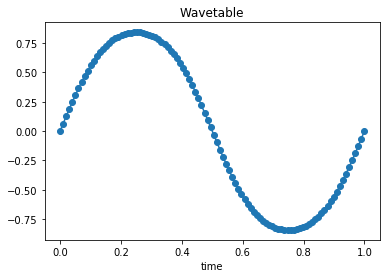

In [223]:
t = np.linspace(0,1, num=100)
# Smoothen wavetable by applying sine function twice
wavetable = np.sin(np.sin(2 * np.pi * t))
plt.plot(t, wavetable, '-o')
plt.xlabel('time')
plt.title("Wavetable")

Before Karplus-Strong algorithm was invented, the standard synthesis technique was the *wavetable synthesis* algorithm. It creates a purely periodic signal; $Y_t$ be the value of $t$th sample, it is equal to the value of $t-p$th sample where $p$ is the *periodicity parameter*.
$$Y_{t}=Y_{t-p}$$

The frequency of the synthesized sound is 
$$\frac{f_s}{p}$$

In [224]:
def synthesize(sampling_speed, wavetable, n_samples):
    """Synthesize audio sample from wavetable.
    
    Parameters
    ----------
    sampling_speed : int
        Target frequency to be synthesized. The lower the sampling speed is,
        the longer the period will be, i.e. low frequency. 
    wavetable : np.array
    n_samples : int 
        Sample rate
        
    Returns
    -------
    sample : array
        Array of sample in the frequency, i.e. sampling_speed
    """
    samples = []
    current_sample = 0
    i = 1; j = 1
    while len(samples) < n_samples:
        current_sample += sampling_speed
        current_sample = current_sample % wavetable.size
        samples.append(wavetable[current_sample])
        current_sample += 1
    
    return np.array(samples)

Let's synthesize two sounds with two different sampling speed(frequency). You will see that the 

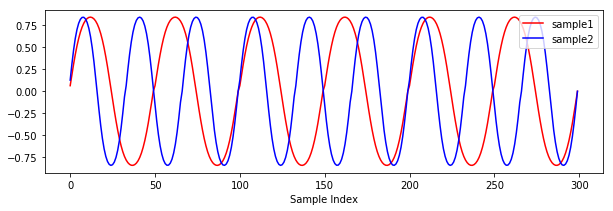

In [225]:
sample1 = synthesize(1, wavetable, 300)
sample2 = synthesize(2, wavetable, 300)
plt.figure(figsize=(10,3))
plt.plot(sample1, 'r', label='sample1')
plt.plot(sample2, 'b', label='sample2')
plt.xlabel('Sample Index')
plt.legend(loc='upper right')

Now let's synthesize something reasonable and listen to it.

Text(0.5,1,'Amplitude between two synthesized samples')

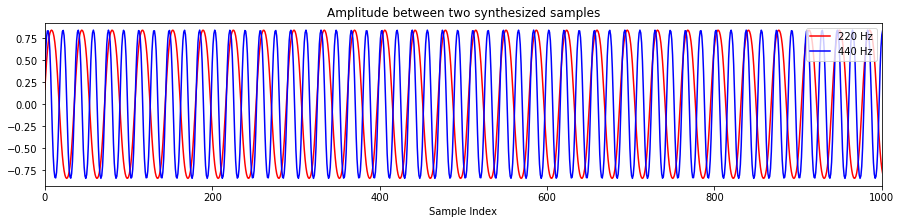

In [273]:
fs = 8000
t = np.linspace(0, 1, num=fs)
wavetable = np.sin(np.sin(2 * np.pi * t))

sample1 = synthesize(220, wavetable, 2 * fs)   # A3
sample2 = synthesize(440, wavetable, 2 * fs)   # A4

plt.figure(figsize=(15,3))
plt.plot(sample1, 'r', label='220 Hz')
plt.plot(sample2, 'b', label='440 Hz')
plt.xlim([0,1000])
plt.xlabel('Sample Index')
plt.legend(loc='upper right')
plt.title('Amplitude between two synthesized samples')

In [274]:
display(Audio(sample1, rate=fs))
display(Audio(sample2, rate=fs))

These sounds sound like the corresponding frequency. However, they sound dull or artificial because the signal is too almost purely periodic as they were sampled from purely periodic wavetable. We can get different timbre using different wavetables. In the following, we study two different wavetables: triangle and sine wavetable.

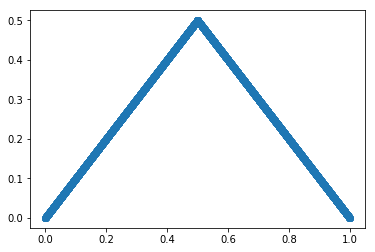

In [50]:
wavetable = t * (t < 0.5) + (-(t-1)) * (t >= 0.5)

plt.plot(t, wavetable, '-o')

In [272]:
sample1 = synthesize(220, wavetable, 2 * fs)
sample2 = synthesize(440, wavetable, 2 * fs)
display(Audio(sample1, rate=fs))
display(Audio(sample2, rate=fs))

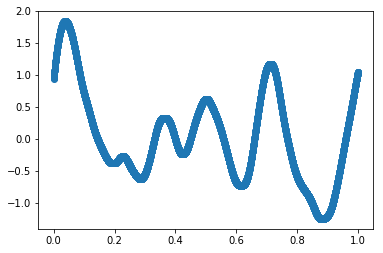

In [60]:
def make_sine_wavetable(n_samples, amps, phases, freqs):
    """Make a wavetable from a sum of sines"""
    t = np.linspace(0,1, num=n_samples)
    wavetable = np.zeros_like(t)
    for amp, phase, freq in zip(amps, phases, freqs):
        wavetable += amp * np.sin(np.sin(2 * np.pi * freq * t + phase)) \
                + amp / 2 * np.sin(np.sin(2 * np.pi * 2 * freq * t + phase))
        
    return wavetable

wavetable = make_sine_wavetable(
    t.size, 
    [0.1, 0.5, 0.8, 0.3], 
    [0, 0.3, 0.4, 0.7],
    [1, 2.1, 3, 4.3])

plt.plot(t, wavetable, '-o')

In [271]:
sample1 = synthesize(220, wavetable, 2 * fs)
sample2 = synthesize(440, wavetable, 2 * fs)
display(Audio(sample1, rate=fs))
display(Audio(sample2, rate=fs))

### Wavetable generation using Karplus-Strong's plucked-string algorithm

$$Y_{t}=\frac{1}{2} ( Y_{t-p}+Y_{t-p-1} )$$

The synthesized tone has a pitch that corresponds to 

$$
\frac{f_s}{p + 0.5}
$$

The tones have realistic decay of a plucked string.

In [ ]:
def karplus_strong(wavetable, n_samples):
    """Synthesize a new waveform from an existing wavetable; modifies last sample by averaging
    
    """
    samples = []
    current_sample = 0
    previous_value = 0
    
    while len(samples) < n_samples:
        wavetable[current_sample] = 0.5 * (
            wavetable[current_sample] + previous_value
        )
        samples.append(wavetable[current_sample])
        previous_value = samples[-1]
        current_sample += 1
        current_sample = current_sample % wavetable.size
    
    return np.array(samples)

In [ ]:
fs = 8000
wavetable_size = fs // 55

According to the authors, the initial randomness in the wavetable is to use *two-level* randomness:
$$
Y_{t}=\left\{\begin{array}{ll}{+A} & {\text { probability } \frac{1}{2}} \\ {-A} & {\text { probability } \frac{1}{2}}\end{array}\right. \text { for }-p \leqslant t \leqslant 0
$$

In our implementation, we set $A = 1$

In [ ]:
wavetable = (2 * np.random.randint(0,2,wavetable_size) - 1).astype(np.float32)

Let's see how our wavetable looks like.

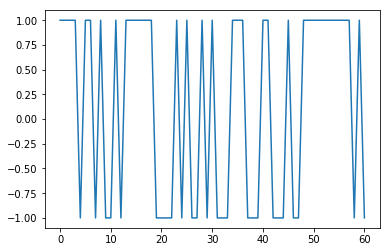

In [262]:
plt.plot(wavetable)

Let's listen to the output of karplus-strong algorithm

In [263]:
sample1 = karplus_strong(wavetable, 2 * fs)
Audio(sample1, rate=fs)

(0, 1000)

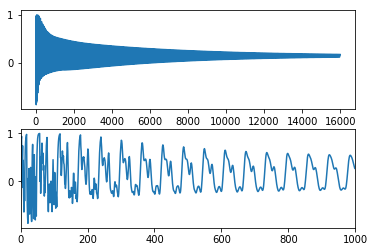

In [264]:
plt.subplot(211)
plt.plot(sample1)
plt.subplot(212)
plt.plot(sample1)
plt.xlim(0, 1000)

### Make a chromatic scale starting from C1, 65.406 Hz

Text(0.5,1,'Chromatic scale starting from C1, 65.406 Hz')

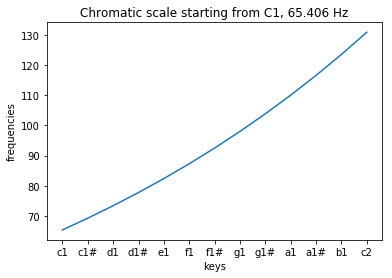

In [250]:
freqs = np.logspace(0,1, num=13, base=2) * 65.406
plt.plot('c1 c1# d1 d1# e1 f1 f1# g1 g1# a1 a1# b1 c2'.split(),freqs)
plt.xlabel('keys')
plt.ylabel('frequencies')
plt.title("Chromatic scale starting from C1, 65.406 Hz")

In [266]:
for freq in freqs:
    wavetable_size = fs // int(freq)
    t = np.linspace(0, 1, num=fs // int(freq))
    wavetable = (2 * np.random.randint(0,2,wavetable_size) - 1).astype(np.float32)
    sample = karplus_strong(wavetable, 2 * fs)
    display(Audio(sample, rate=fs))
    print(f'{freq:.3f} Hz')

65.406 Hz


69.295 Hz


73.416 Hz


77.781 Hz


82.406 Hz


87.307 Hz


92.498 Hz


97.998 Hz


103.826 Hz


109.999 Hz


116.540 Hz


123.470 Hz


130.812 Hz


Let's observe the amplitude of chromatic scales in parallel

Text(0.5,1,'full waveforms of samples')

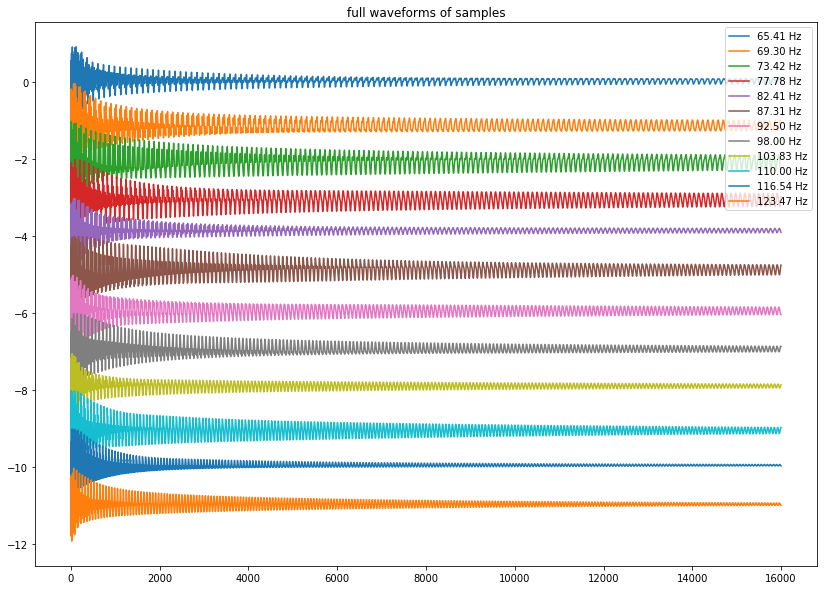

In [268]:
waveforms = []

# Generate samples
for freq in freqs:
    wavetable_size = fs // int(freq)
    wavetable_source = (2 * np.random.randint(0,2,wavetable_size) - 1).astype(np.float32)
    sample = karplus_strong(wavetable_source, 2 * fs)
    waveforms.append(sample)
    
# Plot samples
plt.figure(figsize=(14,10))
for ind, (waveform, freq) in enumerate(zip(waveforms, freqs[:-1])):
    plt.plot(waveform - ind, label=f'{freq:.2f} Hz')
plt.legend(loc='upper right')
plt.title('full waveforms of samples')

Plot spectrograms for each tone.

Text(0.5,1,'Spectrogram')

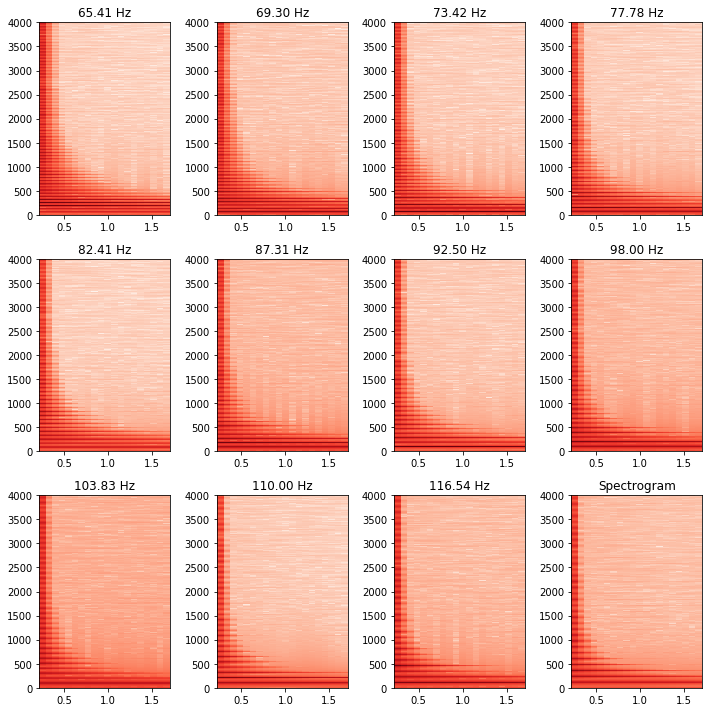

In [270]:
plt.figure(figsize=(10,10))
for ind, (waveform, freq) in enumerate(zip(waveforms, freqs[:-1])):
    plt.subplot(3,4,ind+1)
    plt.specgram(waveform, Fs=fs, NFFT=4096, noverlap=3500, cmap="Reds")
    plt.title(f'{freq:.2f} Hz')
plt.tight_layout()

From the above plot, we observe that different frequencies have different decay rates; high frequencies decay much faster than lower frequencies. The naturalness of the sound derives largely from differing decay rates for the different harmonics. Without the decay, the output wil;l have equal harmonics up to the Nyquist frequency, sounding like a reed organ according to the authors.
 
### Conclusions of the implementation of Karplus-Strong algorithm
We implemented Karplus-Strong algorithm which synthesizes natural acoustic guitar sound. The computation can be done on a consumer laptop with low CPU cost in short time.

## Conclusions of the Learning Diary

- Several methods available for physics-based sound synthesis
    - Source-filter, modal, mass-spring, FDTD, wave digital and digital waveguide models
- Digital waveguide synthesis used to be the most popular method 
- Modal synthesis and FDTD methods have become more attractive thanks to faster computers

## References

- *Digital synthesis of plucked-string and drum timbres* by Karplus and Strong
- http://lab.andre-michelle.com/karplus-strong-guitar
- http://flothesof.github.io/Karplus-Strong-algorithm-Python.html